In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_down_ETH3.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,ETH,down,2018-09-05 18:00:00,CryptoGulp,0,0,NaN,Top 5 Cryptocurrencies Prices Bitcoin $BTC: $6...
1,ETH,down,2018-09-05 18:00:01,eth_hourly,0,0,#ethereum,"Current #ethereum price is $245.27, a decrease..."
2,ETH,down,2018-09-05 18:00:02,asens_inc,0,0,#Bitcoin #Bitcoin #NEM #XEM #Monacoin #Ethereu...,"09/06 03:00現在 #Bitcoin : 772,970円↓ #NEM #XEM :..."
3,ETH,down,2018-09-05 18:00:02,FluPhotos,0,0,#AltCoins #cryptocurrency #bitcoin #bitcoin #e...,Bitstamp: $6913 Bitfinex: $6931.4 Coinbase: $6...
4,ETH,down,2018-09-05 18:00:03,CryptoShopUK,0,0,NaN,"Bitcoin @£5,796.67 | Ethereum @£209.15 | Litec..."
...,...,...,...,...,...,...,...,...
1832,ETH,down,2018-09-05 23:59:10,cryptosUSD,0,0,#USD #Dollar #BTC #BTC #ETH #XRP #BCH #LTC #Tr...,Prices update in $USD (1 hour): $BTC - 6671.7...
1833,ETH,down,2018-09-05 23:59:20,SaturnMercury1,0,0,#Bitcoin #Bitcoin #Ethereum #Swissborg,Liked this @Cointelegraph @swissborg https://...
1834,ETH,down,2018-09-05 23:59:20,cysites,0,1,#crypto #blockchain #ether #technology #BTC #B...,Current Top 3 Dapps by Daily Active Users (DAU...
1835,ETH,down,2018-09-05 23:59:21,casoutuuca,0,0,NaN,仮想通貨イーサリアム（Ethereum・通貨単位：ETH）とは？ http://toho-p...


In [5]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=str(x) ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [6]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [8]:
text['text']

0       [top, 5, cryptocurrencies, prices, bitcoin, $,...
1       [current, ethereum, price, is, $, 245.27, ,, a...
2       [09, 06, 03:00現在, bitcoin, :, 772,970円↓, nem, ...
3       [bitstamp, :, $, 6913, bitfinex, :, $, 6931.4,...
4       [bitcoin, @, £5,796.67, |, ethereum, @, £209.1...
                              ...                        
1832    [prices, update, in, $, usd, (, 1, hour, ), :,...
1833    [liked, this, @, cointelegraph, @, swissborg, ...
1834    [current, top, 3, dapps, by, daily, active, us...
1835    [仮想通貨イーサリアム（ethereum・通貨単位：eth）とは？, bitcoin, 20...
1836    [prices, update, in, $, eur, (, 1, hour, ), :,...
Name: text, Length: 1837, dtype: object

In [9]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
text['text']

0       [top, cryptocurrencies, prices, $, btc, :, $, ...
1       [current, ethereum, price, $, ,, decrease, %, ...
2       [bitcoin, :, nem, xem, :, monacoin, :, ethereu...
3       [bitstamp, :, $, bitfinex, :, $, :, $, check, ...
4       [bitcoin, @, £5,796.67, |, ethereum, @, £209.1...
                              ...                        
1832    [prices, update, $, usd, (, hour, ), :, $, btc...
1833    [liked, @, cointelegraph, @, swissborg, e, cry...
1834    [current, top, dapps, daily, active, users, (,...
1835    [仮想通貨イーサリアム（ethereum・通貨単位：eth）とは？, bitcoin, post]
1836    [prices, update, $, eur, (, hour, ), :, $, btc...
Name: text, Length: 1837, dtype: object

In [14]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [19]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [20]:
article_contents = tokenized_doc.values.tolist()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [22]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [23]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [24]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [25]:
word2id = defaultdict(lambda: 0)

In [26]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [27]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [28]:
len(tf_idf_result)

4482

In [29]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

4482


In [30]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

4482

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

4482

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

132.59330912703345

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.00041419339009873823

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

1.9411045619317275

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[-0.2548730671405792, -0.2379392385482788, 0.2...",ethereum,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000596,0.693624,0.306972,NaN
3,"[-0.11851038783788681, -0.10946661978960037, 0...",bitcoin,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.007305,0.518093,0.489212,NaN
20,"[-0.22473517060279846, -0.21632932126522064, 0...",blockchain,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000032,0.205603,0.794430,NaN
38,"[-0.21829155087471008, -0.20790588855743408, 0...",crypto,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000056,0.184683,0.815373,NaN
14,"[-0.18547402322292328, -0.1784590780735016, 0....",cryptocurrency,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000083,0.156899,0.843184,NaN
223,"[-0.14001503586769104, -0.13963450491428375, 0...",trade,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000195,0.058837,0.941358,NaN
86,"[-0.11041731387376785, -0.1107155904173851, 0....",news,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000978,0.058510,0.942468,NaN
0,"[-0.1298379898071289, -0.12537135183811188, 0....",cryptocurrencies,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000414,0.054588,0.945827,NaN
103,"[-0.18007563054561615, -0.1755058914422989, 0....",token,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000070,0.046416,0.953654,NaN
7,"[-0.13459859788417816, -0.13421206176280975, 0...",market,0,"[-0.011890528, -0.01164187, 0.012288874, 0.027...",0.000091,0.035956,0.964135,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
21,"[-0.01768728718161583, -0.014073826372623444, ...",litecoin,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.014101,0.133364,0.880737,NaN
1,"[-0.026484886184334755, -0.017551077529788017,...",price,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.035336,0.137940,0.897396,NaN
28,"[-0.021568071097135544, -0.018979961052536964,...",ripple,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.048740,0.146112,0.902628,NaN
29,"[0.0011079966789111495, 0.0060988436453044415,...",monero,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.006316,0.088256,0.918060,NaN
810,"[0.0008980336133390665, 0.0011196699924767017,...",september,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.002191,0.075181,0.927011,NaN
111,"[0.010922566056251526, 0.006934523116797209, 0...",iota,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.025525,0.085968,0.939557,NaN
179,"[0.008760180324316025, 0.021122192963957787, -...",analysis,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.099215,0.069297,1.029918,NaN
208,"[0.013581398874521255, 0.016339214518666267, -...",stellar,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.150160,0.085641,1.064519,NaN
1855,"[-0.004690926522016525, 0.002436102367937565, ...",elvismanyika,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.406608,0.000327,1.406282,NaN
3971,"[0.002494390355423093, -0.00542050413787365, 0...",sabes,1,"[-0.0014226846, 8.611334e-05, 0.0048069027, 0....",0.491328,0.000327,1.491001,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1399,"[-0.00859776046127081, -0.0077964249067008495,...",şimdi,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.036961,0.000327,1.036635,NaN
1662,"[-0.005653339438140392, -0.005312574096024036,...",paradigm,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.040456,0.000327,1.040130,NaN
1181,"[-0.0016125375404953957, -0.004525847733020782...",ölçeklenebilirliğini,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.044341,0.000327,1.044014,NaN
3769,"[-0.000875594443641603, -0.0025196336209774017...",puedes,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.045278,0.000327,1.044952,NaN
746,"[-0.009092378430068493, -0.004253082908689976,...",legislature,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.046105,0.000327,1.045778,NaN
3384,"[-0.001402217778377235, -0.002028831047937274,...",erroneous,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.050261,0.000327,1.049934,NaN
1930,"[-0.008894561789929867, -0.00248696212656796, ...",breitman,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.059058,0.000327,1.058732,NaN
1716,"[-0.0030613827984780073, -0.007695716340094805...",fashion,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.061192,0.000654,1.060538,NaN
1895,"[-0.009061833843588829, -0.0037795016542077065...",handy,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.061221,0.000654,1.060568,NaN
1277,"[-0.0007796925492584705, -0.003961000125855207...",bilhoes,2,"[-0.0018836381, -0.0013417847, 0.001585733, 0....",0.061202,0.000327,1.060875,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[0.041352611035108566, 0.041442424058914185, -...",cash,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.080012,0.089563,0.990449,NaN
631,"[0.021469205617904663, 0.035464391112327576, -...",cardano,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.331897,0.077796,1.254102,NaN
1718,"[0.006309580523520708, -0.0010016846936196089,...",bitcointrade,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.280623,0.000654,1.279969,NaN
115,"[0.008799033239483833, 0.005631061736494303, -...",bitcashcoin,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.281686,0.001307,1.280378,NaN
2520,"[0.007016060408204794, 0.005100244656205177, -...",venture,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.306150,0.000327,1.305823,NaN
2253,"[0.0006533598061650991, 0.006947930436581373, ...",gqkvbv,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.331001,0.000327,1.330674,NaN
3062,"[0.0005262806080281734, 0.001199538353830576, ...",felt,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.369107,0.000327,1.368780,NaN
3830,"[0.005190259777009487, 0.0014993783552199602, ...",meltdown,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.390737,0.001961,1.388776,NaN
2028,"[0.0032914578914642334, -0.0022911515552550554...",withdraw,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.423978,0.000327,1.423651,NaN
3891,"[0.005842932965606451, -0.000657641445286572, ...",ichicoins,3,"[0.0020550468, 0.0016808594, -0.0021882732, -0...",0.447250,0.000654,1.446596,NaN


In [63]:
y_km = temp_cluster_result['cluster'].values

In [64]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

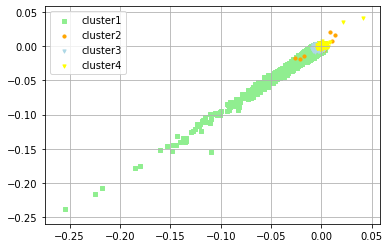

In [65]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [66]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

4137

In [67]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

27

In [68]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

262

In [69]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 부정

56

In [63]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 5 # 이슈

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 2 # 부정

In [71]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [72]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [73]:
kmeans.inertia_

50.524009704589844

In [74]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 1 2 ... 0 0 0]


In [75]:
cluster_values= list(model.wv.vocab)

In [76]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-50.524009704589844


In [77]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [78]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.67674804


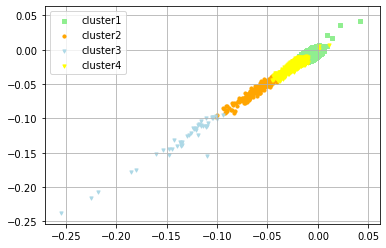

In [79]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [80]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [81]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [82]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [83]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [84]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [85]:
import scipy.spatial.distance as dist

In [86]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [87]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2696,"[-0.008973388932645321, -0.0030171943362802267...",dart,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.025314,0.000327,1.024987,NaN
1184,"[-0.003959140740334988, -0.005879024975001812,...",speed'in,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.025631,0.000327,1.025304,NaN
1130,"[-0.0033433805219829082, -0.009233120828866959...",geri,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.025677,0.000327,1.025350,NaN
3507,"[-0.005218361970037222, -0.004732485860586166,...",tingname,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.025776,0.000327,1.025449,NaN
3544,"[-0.0039496757090091705, -0.005711204838007688...",underground,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.026265,0.000654,1.025611,NaN
408,"[-0.0049476176500320435, -0.001607215031981468...",disponibles,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.025992,0.000327,1.025665,NaN
998,"[-0.0020927973091602325, -0.007434126920998096...",formula,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.026077,0.000327,1.025751,NaN
3791,"[-0.007316687144339085, -0.006303437054157257,...",capitalize,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.026158,0.000327,1.025831,NaN
1398,"[-0.004895208403468132, -0.008744305931031704,...",kasamicam,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.026171,0.000327,1.025844,NaN
1577,"[-0.008471171371638775, -0.008240033872425556,...",dataconstellations,0,"[-0.0054160524, -0.005302699, 0.0056382366, 0....",0.026180,0.000327,1.025853,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 기술한계

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
970,"[-0.061938028782606125, -0.0590362548828125, 0...",call,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.028413,0.006537,1.021876,NaN
700,"[-0.06118391826748848, -0.0610438697040081, 0....",know,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.029647,0.006211,1.023437,NaN
377,"[-0.06107049807906151, -0.060141421854496, 0.0...",last,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.031188,0.006864,1.024324,NaN
2221,"[-0.06637279689311981, -0.05576203763484955, 0...",store,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.030296,0.005884,1.024412,NaN
137,"[-0.05915532261133194, -0.06293760240077972, 0...",first,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.029820,0.005230,1.024590,NaN
635,"[-0.06414014846086502, -0.06039901822805405, 0...",steem,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.030584,0.005884,1.024700,NaN
572,"[-0.06699749827384949, -0.060974158346652985, ...",need,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.030655,0.005230,1.025425,NaN
1204,"[-0.05779677629470825, -0.05765030160546303, 0...",development,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.033088,0.005230,1.027858,NaN
411,"[-0.0575987882912159, -0.06254077702760696, 0....",publish,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.037140,0.007845,1.029295,NaN
3665,"[-0.0605170801281929, -0.06331557780504227, 0....",bboylife,1,"[-0.062099315, -0.06028615, 0.06368031, 0.1411...",0.035581,0.005230,1.030351,NaN


In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.11851038783788681, -0.10946661978960037, 0...",bitcoin,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.315580,0.518093,0.797487,NaN
223,"[-0.14001503586769104, -0.13963450491428375, 0...",trade,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.075495,0.058837,1.016658,NaN
101,"[-0.12775635719299316, -0.12426991760730743, 0...",criptomonedas,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.032955,0.015363,1.017592,NaN
7,"[-0.13459859788417816, -0.13421206176280975, 0...",market,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.066170,0.035956,1.030214,NaN
355,"[-0.13573268055915833, -0.1365956962108612, 0....",bounty,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.061099,0.021574,1.039525,NaN
775,"[-0.1371634155511856, -0.1338845044374466, 0.1...",platform,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.066856,0.020920,1.045936,NaN
1799,"[-0.13438867032527924, -0.13920974731445312, 0...",free,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.084715,0.016344,1.068371,NaN
0,"[-0.1298379898071289, -0.12537135183811188, 0....",cryptocurrencies,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.143615,0.054588,1.089027,NaN
15,"[-0.14305593073368073, -0.1315060406923294, 0....",exchange,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.115195,0.021247,1.093948,NaN
441,"[-0.13551032543182373, -0.140156090259552, 0.1...",project,2,"[-0.13273643, -0.12954764, 0.13643706, 0.30363...",0.117086,0.017651,1.099435,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2432,"[-0.02301989682018757, -0.023547545075416565, ...",forbes,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.026461,0.002288,1.024173,NaN
330,"[-0.02124827913939953, -0.02128720097243786, 0...",bearish,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.029501,0.003596,1.025905,NaN
1151,"[-0.01978711225092411, -0.02232249639928341, 0...",benefit,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.027909,0.001961,1.025948,NaN
1860,"[-0.022519735619425774, -0.02380136400461197, ...",play,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.027927,0.001961,1.025966,NaN
2823,"[-0.027006836608052254, -0.023443523794412613,...",rival,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.028278,0.002288,1.025990,NaN
435,"[-0.019835656508803368, -0.026211300864815712,...",startup,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.029542,0.003269,1.026273,NaN
766,"[-0.01934589445590973, -0.022968992590904236, ...",product,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.029035,0.002615,1.026420,NaN
331,"[-0.02326459065079689, -0.02197459153831005, 0...",correction,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.028444,0.001961,1.026483,NaN
2820,"[-0.028218263760209084, -0.019926637411117554,...",fail,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.028808,0.001634,1.027174,NaN
1889,"[-0.019901026040315628, -0.01816561073064804, ...",instaico,3,"[-0.023095507, -0.022530034, 0.02379732, 0.052...",0.028905,0.001634,1.027270,NaN


In [103]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 투자

3696

In [104]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 기술한계

170

In [105]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 거래소

44

In [106]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 이슈

572

In [107]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [108]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 투자

In [109]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 4 # 기술한계

In [110]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소

In [111]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 이슈

In [112]:
temp_cluster_result1['Silhouette'] = 0.67674804
temp_cluster_result['Silhouette'] = 0.67674804
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [113]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_ETH3_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_ETH3_cosine")